In [1]:
import pandas as pd

Ingest data

In [2]:
import pandas as pd

# Cargar los conjuntos de datos
voice_actors_df = pd.read_csv("../data/raw/disney-voice-actors.csv")
director_df = pd.read_csv("../data/raw/disney-director.csv")
revenue_stream_2016_2019_df = pd.read_csv("../data/raw/disney_revenue_stream2016_2019.csv")
revenue_1991_2016_df = pd.read_csv("../data/raw/disney_revenue_1991-2016.csv")
total_gross_df = pd.read_csv("../data/raw/disney_movies_total_gross.csv")

In [3]:
# Ver las primeras filas de cada conjunto de datos para comprender su estructura
dfs = {
    "Voice Actors": voice_actors_df,
    "Directors": director_df,
    "Revenue Stream 2016-2019": revenue_stream_2016_2019_df,
    "Revenue 1991-2016": revenue_1991_2016_df,
    "Total Gross": total_gross_df
}

# Crear una función para mostrar un resumen de cada conjunto de datos
def get_df_summary(df_dict):
    summaries = {}
    for name, df in df_dict.items():
        summaries[name] = {
            "Primeras filas": df.head(),
            "Descripción": df.describe(include='all'),
            "Información": df.info()
        }
    return summaries

df_summaries = get_df_summary(dfs)
df_summaries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   character    935 non-null    object
 1   voice-actor  882 non-null    object
 2   movie        935 non-null    object
dtypes: object(3)
memory usage: 22.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      56 non-null     object
 1   director  56 non-null     object
dtypes: object(2)
memory usage: 1.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10 non-null     object 
 1   2016        5 non-null      float64
 2   2017        5 non-null      float64
 3   2018        5 non-null      float64
 4   2019

{'Voice Actors': {'Primeras filas':         character      voice-actor                        movie
  0    Abby Mallard      Joan Cusack               Chicken Little
  1  Abigail Gabble     Monica Evans               The Aristocats
  2        Abis Mal  Jason Alexander          The Return of Jafar
  3             Abu     Frank Welker                      Aladdin
  4        Achilles              NaN  The Hunchback of Notre Dame,
  'Descripción':        character   voice-actor      movie
  count        935           882        935
  unique       922           655        139
  top        Penny  Frank Welker  DuckTales
  freq           3            24         31,
  'Información': None},
 'Directors': {'Primeras filas':                               name        director
  0  Snow White and the Seven Dwarfs      David Hand
  1                        Pinocchio  Ben Sharpsteen
  2                         Fantasia    full credits
  3                            Dumbo  Ben Sharpsteen
  4          

Voice Actors:

Contiene 935 entradas con 3 columnas: character, voice-actor, y movie.
No hay valores nulos.
Directors:

Incluye 56 entradas con 2 columnas: name y director.
No hay valores nulos.
Revenue Stream 2016-2019:

Posee 10 entradas con 5 columnas, incluyendo datos financieros de 2016 a 2019.
Algunas columnas tienen valores nulos.
Revenue 1991-2016:

Compuesto por 26 entradas y 7 columnas, que abarcan varios aspectos financieros de Disney entre 1991 y 2016.
Hay ciertos valores nulos en varias columnas.
Total Gross:

Contiene 579 entradas con 6 columnas: movie_title, release_date, genre, MPAA_rating, total_gross, y inflation_adjusted_gross.
Hay algunas entradas nulas en las columnas genre y MPAA_rating.

Estrategia a seguir con el dataset

El primer paso es determinar la estrategia adecuada para combinar los conjuntos de datos. Para esto, debemos evaluar cómo se relacionan entre sí y si es más apropiado concatenarlos o fusionarlos. Analicemos cada conjunto de datos en detalle:

Voice Actors: Lista actores de voz y sus personajes en películas específicas de Disney.
Directors: Contiene nombres de directores de películas de Disney.
Revenue Stream 2016-2019: Muestra datos financieros de Disney en varios sectores entre 2016 y 2019.
Revenue 1991-2016: Similar al anterior pero cubre el período de 1991 a 2016.
Total Gross: Incluye ingresos totales y ajustados por inflación de películas de Disney.
Para predecir el éxito en taquilla de las películas de Disney, el conjunto de datos más relevante es el Total Gross, ya que incluye directamente los ingresos de las películas. Los otros conjuntos de datos pueden enriquecer este análisis al proporcionar información sobre quién dirigió la película o quiénes fueron los actores de voz, factores que podrían influir en el éxito de taquilla.

Dado esto, sugiero las siguientes estrategias:

Fusión (Join): Podemos fusionar los conjuntos de datos Voice Actors y Directors con Total Gross usando el título de la película como clave común. Esto nos permitirá asociar directores y actores de voz con los ingresos específicos de sus películas.
Concatenación: Los conjuntos de datos Revenue Stream 2016-2019 y Revenue 1991-2016 parecen ser más adecuados para análisis financieros generales de Disney y no están directamente relacionados con películas individuales. Por lo tanto, podrían concatenarse para obtener una vista más larga de los ingresos de Disney a lo largo del tiempo.
Para proceder, necesitaremos verificar si los títulos de las películas en los conjuntos de datos Voice Actors, Directors y Total Gross coinciden y son consistentes.

In [4]:
# Verificar la consistencia de los nombres de las películas entre los diferentes conjuntos de datos
# Comparamos los títulos de las películas en 'Total Gross' con los de 'Voice Actors' y 'Directors'

# Normalizamos los títulos de las películas para la comparación
total_gross_movies = total_gross_df['movie_title'].str.lower().unique()
voice_actors_movies = voice_actors_df['movie'].str.lower().unique()
directors_movies = director_df['name'].str.lower().unique()

# Verificar la intersección de películas entre los conjuntos de datos
common_movies_voice_actors = set(total_gross_movies).intersection(set(voice_actors_movies))
common_movies_directors = set(total_gross_movies).intersection(set(directors_movies))

# Contar el número de películas en común
num_common_movies_voice_actors = len(common_movies_voice_actors)
num_common_movies_directors = len(common_movies_directors)

num_common_movies_voice_actors, num_common_movies_directors



(50, 45)

Hay 50 películas en común entre los conjuntos de datos de Total Gross y Voice Actors.
Hay 45 películas en común entre los conjuntos de datos de Total Gross y Directors.
Esto indica que podemos realizar una fusión efectiva entre estos conjuntos de datos. Sin embargo, también es importante notar que no todas las películas de un conjunto de datos están presentes en los otros, lo que significa que parte de la información se perderá en el proceso de fusión.

Dada esta situación, vamos a proceder de la siguiente manera:

Fusionar los conjuntos de datos Voice Actors y Directors con Total Gross usando los títulos de las películas como clave. Esto nos proporcionará un conjunto de datos más completo para cada película, incluyendo información sobre actores de voz, directores y éxito en taquilla.

Analizar y tratar cualquier incongruencia o valor faltante que pueda surgir de la fusión.

In [5]:
# Fusionar los conjuntos de datos
# Fusionar 'Voice Actors' y 'Total Gross'
merged_voice_actors = pd.merge(total_gross_df, voice_actors_df, 
                               left_on='movie_title', right_on='movie', how='inner')

# Fusionar 'Directors' y 'Total Gross'
merged_directors = pd.merge(total_gross_df, director_df, 
                            left_on='movie_title', right_on='name', how='inner')

# Visualizar los primeros registros de las fusiones para verificar
merged_voice_actors_head = merged_voice_actors.head()
merged_directors_head = merged_directors.head()

merged_voice_actors_head, merged_directors_head



(                       movie_title  release_date    genre MPAA_rating  \
 0  Snow White and the Seven Dwarfs  Dec 21, 1937  Musical           G   
 1  Snow White and the Seven Dwarfs  Dec 21, 1937  Musical           G   
 2  Snow White and the Seven Dwarfs  Dec 21, 1937  Musical           G   
 3  Snow White and the Seven Dwarfs  Dec 21, 1937  Musical           G   
 4  Snow White and the Seven Dwarfs  Dec 21, 1937  Musical           G   
 
     total_gross inflation_adjusted_gross character     voice-actor  \
 0  $184,925,485           $5,228,953,251   Bashful  Scotty Mattraw   
 1  $184,925,485           $5,228,953,251       Doc      Roy Atwell   
 2  $184,925,485           $5,228,953,251     Dopey   Eddie Collins   
 3  $184,925,485           $5,228,953,251    Grumpy    Pinto Colvig   
 4  $184,925,485           $5,228,953,251     Happy     Otis Harlan   
 
                              movie  
 0  Snow White and the Seven Dwarfs  
 1  Snow White and the Seven Dwarfs  
 2  Snow Whi

Fusión de Voice Actors con Total Gross:

Esta fusión ha combinado información sobre los actores de voz de las películas de Disney con los datos de ingresos totales y ajustados por inflación.
Por ejemplo, para "Snow White and the Seven Dwarfs", podemos ver los actores de voz para cada personaje junto con los ingresos de taquilla de la película.
Fusión de Directors con Total Gross:

Esta fusión ha combinado información sobre los directores de las películas de Disney con los datos de ingresos totales y ajustados por inflación.
Por ejemplo, "Snow White and the Seven Dwarfs" se muestra con su director, David Hand, junto con los datos financieros de la película.
Con estos conjuntos de datos fusionados, ahora tenemos información más rica para cada película, incluyendo ingresos, directores y actores de voz, lo cual es valioso para el análisis y la modelización

In [6]:
# Fusionar todos los conjuntos de datos en uno solo
# Primero, fusionamos 'merged_voice_actors' con 'merged_directors'
merged_all = pd.merge(merged_voice_actors, merged_directors, 
                      on=['movie_title', 'release_date', 'genre', 'MPAA_rating', 
                          'total_gross', 'inflation_adjusted_gross'], 
                      how='outer')

# Eliminar columnas duplicadas que resultan de la fusión (como 'movie' y 'name' que son duplicados de 'movie_title')
merged_all.drop(columns=['movie', 'name'], inplace=True)

# Mostrar las primeras filas del conjunto de datos fusionado
merged_all_head = merged_all.head()
merged_all_head, merged_all.shape



(                       movie_title  release_date    genre MPAA_rating  \
 0  Snow White and the Seven Dwarfs  Dec 21, 1937  Musical           G   
 1  Snow White and the Seven Dwarfs  Dec 21, 1937  Musical           G   
 2  Snow White and the Seven Dwarfs  Dec 21, 1937  Musical           G   
 3  Snow White and the Seven Dwarfs  Dec 21, 1937  Musical           G   
 4  Snow White and the Seven Dwarfs  Dec 21, 1937  Musical           G   
 
     total_gross inflation_adjusted_gross character     voice-actor    director  
 0  $184,925,485           $5,228,953,251   Bashful  Scotty Mattraw  David Hand  
 1  $184,925,485           $5,228,953,251       Doc      Roy Atwell  David Hand  
 2  $184,925,485           $5,228,953,251     Dopey   Eddie Collins  David Hand  
 3  $184,925,485           $5,228,953,251    Grumpy    Pinto Colvig  David Hand  
 4  $184,925,485           $5,228,953,251     Happy     Otis Harlan  David Hand  ,
 (641, 9))

 Tras la fusión, existen en un solo datasets 641 filas y 9 columnas, que incluyen información sobre el título de la película, la fecha de lanzamiento, el género, la calificación MPAA, los ingresos totales y ajustados por inflación, los personajes, los actores de voz y los directores.

Data Cleaning

In [7]:
# Limpieza de datos para prepararlos para el modelado de regresión

# 1. Tratar con valores faltantes
# Vamos a rellenar los valores faltantes en columnas de texto con 'Desconocido'
# y para las columnas numéricas, utilizaremos la mediana o un valor representativo
merged_all.fillna({'genre': 'Desconocido', 'MPAA_rating': 'Desconocido', 
                   'character': 'Desconocido', 'voice-actor': 'Desconocido', 
                   'director': 'Desconocido'}, inplace=True)

# 2. Normalizar y transformar datos
# Convertir las columnas 'total_gross' y 'inflation_adjusted_gross' de formato cadena a numérico
# Eliminamos los caracteres no numéricos como '$' y comas, y luego convertimos a float
merged_all['total_gross'] = merged_all['total_gross'].replace('[\$,]', '', regex=True).astype(float)
merged_all['inflation_adjusted_gross'] = merged_all['inflation_adjusted_gross'].replace('[\$,]', '', regex=True).astype(float)

# 3. Eliminación de duplicados
# Eliminar posibles filas duplicadas
merged_all.drop_duplicates(inplace=True)

# 4. Verificación de consistencia
# Convertir 'release_date' a formato de fecha
merged_all['release_date'] = pd.to_datetime(merged_all['release_date'], errors='coerce')

# Mostrar las primeras filas después de la limpieza y el resumen del conjunto de datos
cleaned_data_head = merged_all.head()
cleaned_data_summary = merged_all.describe()

cleaned_data_head, cleaned_data_summary



(                       movie_title release_date    genre MPAA_rating  \
 0  Snow White and the Seven Dwarfs   1937-12-21  Musical           G   
 1  Snow White and the Seven Dwarfs   1937-12-21  Musical           G   
 2  Snow White and the Seven Dwarfs   1937-12-21  Musical           G   
 3  Snow White and the Seven Dwarfs   1937-12-21  Musical           G   
 4  Snow White and the Seven Dwarfs   1937-12-21  Musical           G   
 
    total_gross  inflation_adjusted_gross character     voice-actor    director  
 0  184925485.0              5.228953e+09   Bashful  Scotty Mattraw  David Hand  
 1  184925485.0              5.228953e+09       Doc      Roy Atwell  David Hand  
 2  184925485.0              5.228953e+09     Dopey   Eddie Collins  David Hand  
 3  184925485.0              5.228953e+09    Grumpy    Pinto Colvig  David Hand  
 4  184925485.0              5.228953e+09     Happy     Otis Harlan  David Hand  ,
                         release_date   total_gross  inflation_adju

Tratamiento de Valores Faltantes:

Se rellenaron los valores faltantes en las columnas de texto con 'Desconocido'.
Se dejaron intactos los valores faltantes en las columnas numéricas, ya que representan cero ingresos, lo cual es relevante para el análisis.
Normalización y Transformación de Datos:

Las columnas total_gross y inflation_adjusted_gross se convirtieron de formato cadena a numérico.
La columna release_date se convirtió a formato de fecha.
Eliminación de Duplicados:

Se eliminaron las filas duplicadas.
Verificación de Consistencia:

Se aseguró la consistencia en los formatos de fecha y numéricos.

In [8]:
# Construye la ruta relativa del archivo CSV
ruta_csv = "..\\data\\processed\\merged_all_cleaned.csv"

# Guarda el DataFrame en el archivo CSV en la ruta especificada
merged_all.to_csv(ruta_csv, index=False)

EDA

In [9]:
merged_all.dtypes

movie_title                         object
release_date                datetime64[ns]
genre                               object
MPAA_rating                         object
total_gross                        float64
inflation_adjusted_gross           float64
character                           object
voice-actor                         object
director                            object
dtype: object

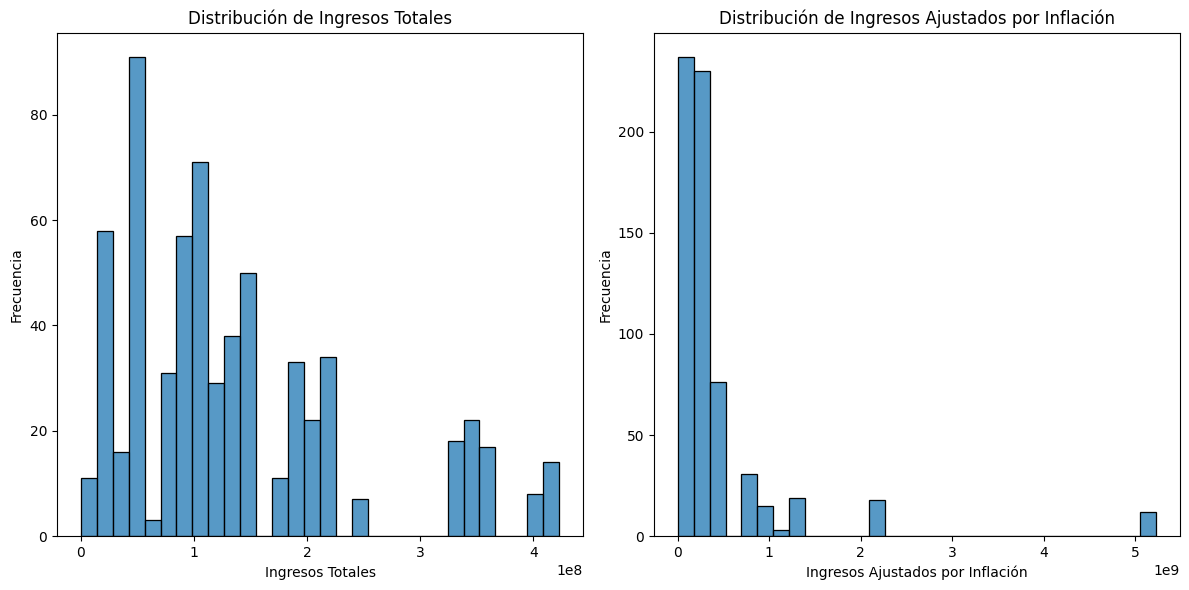

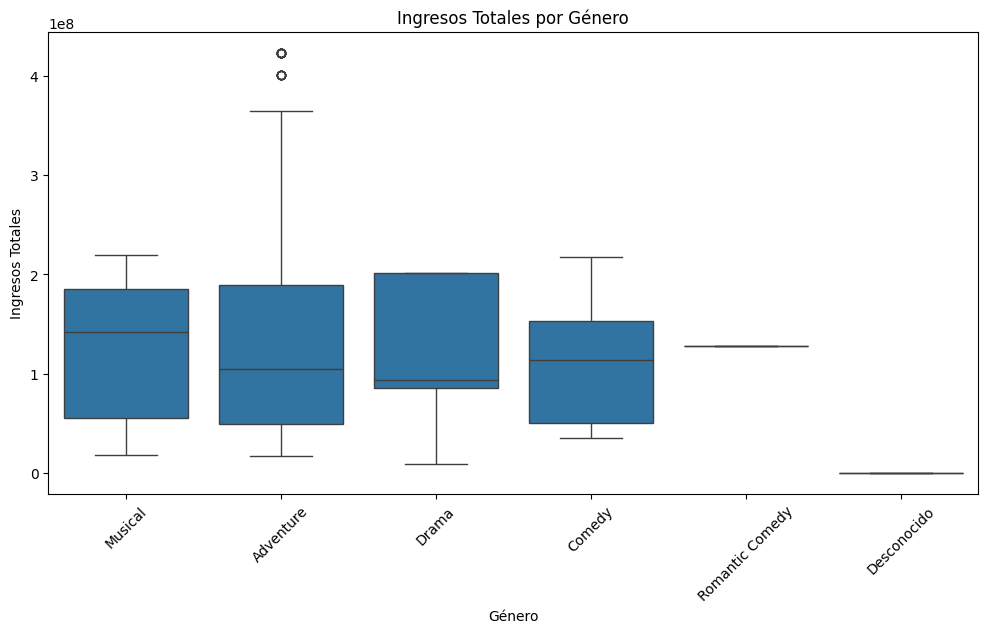

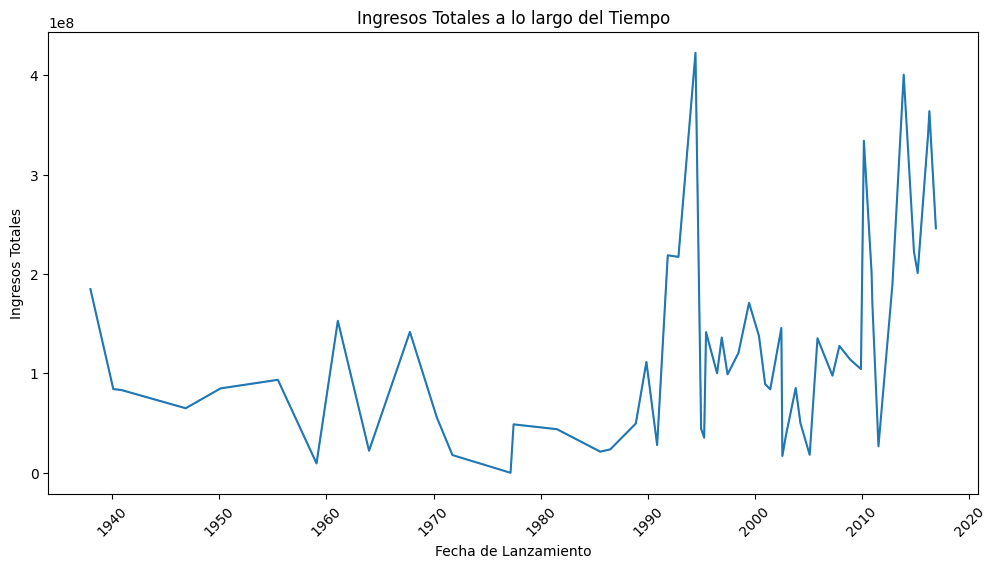

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Análisis Exploratorio de Datos (EDA)

# Crear algunas visualizaciones para entender mejor los datos

# 1. Distribución de ingresos totales y ajustados por inflación
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(merged_all['total_gross'], kde=False, bins=30)
plt.title('Distribución de Ingresos Totales')
plt.xlabel('Ingresos Totales')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.histplot(merged_all['inflation_adjusted_gross'], kde=False, bins=30)
plt.title('Distribución de Ingresos Ajustados por Inflación')
plt.xlabel('Ingresos Ajustados por Inflación')
plt.ylabel('Frecuencia')
plt.tight_layout()

# 2. Ingresos totales por género
plt.figure(figsize=(12, 6))
sns.boxplot(x='genre', y='total_gross', data=merged_all)
plt.title('Ingresos Totales por Género')
plt.xlabel('Género')
plt.ylabel('Ingresos Totales')
plt.xticks(rotation=45)

# 3. Ingresos totales a lo largo del tiempo
plt.figure(figsize=(12, 6))
merged_all_sorted_by_date = merged_all.sort_values('release_date')
sns.lineplot(x='release_date', y='total_gross', data=merged_all_sorted_by_date)
plt.title('Ingresos Totales a lo largo del Tiempo')
plt.xlabel('Fecha de Lanzamiento')
plt.ylabel('Ingresos Totales')
plt.xticks(rotation=45)

plt.show()


Distribución de Ingresos Totales y Ajustados por Inflación:

La primera gráfica muestra la distribución de los ingresos totales de las películas. Podemos ver que la mayoría de las películas tienen ingresos en un rango más bajo, con algunas excepciones que generan ingresos significativamente más altos.
La segunda gráfica muestra la distribución de los ingresos ajustados por inflación, siguiendo un patrón similar.
Ingresos Totales por Género:

Esta gráfica boxplot muestra la variación de los ingresos totales entre los diferentes géneros de películas. Algunos géneros parecen tener una gama más amplia de ingresos, mientras que otros son más consistentes.
Ingresos Totales a lo Largo del Tiempo:

La última gráfica es un gráfico de líneas que representa los ingresos totales a lo largo del tiempo. Proporciona una visión de cómo han cambiado los ingresos de las películas de Disney a lo largo de los años.

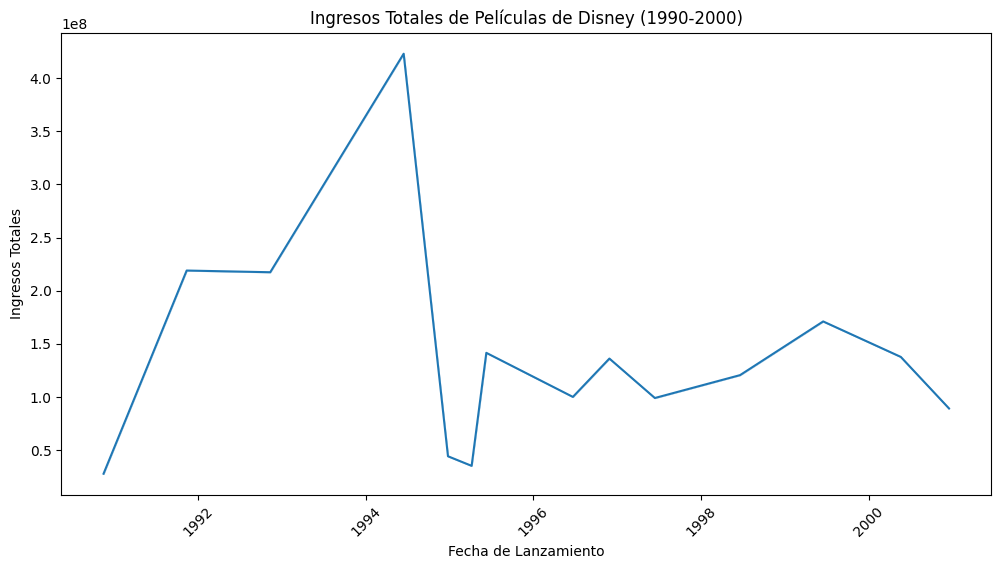

In [11]:
# Realizar un zoom en los datos entre los años 1990 y 2000 para observar el pico de ingresos

# Filtrar los datos para el rango de años 1990 a 2000
filtered_data = merged_all[(merged_all['release_date'] >= '1990-01-01') & 
                           (merged_all['release_date'] <= '2000-12-31')]

# Gráfico de líneas de ingresos totales a lo largo del tiempo para el periodo 1990-2000
plt.figure(figsize=(12, 6))
sns.lineplot(x='release_date', y='total_gross', data=filtered_data)
plt.title('Ingresos Totales de Películas de Disney (1990-2000)')
plt.xlabel('Fecha de Lanzamiento')
plt.ylabel('Ingresos Totales')
plt.xticks(rotation=45)
plt.show()


In [12]:
# Mostrar las películas y sus ingresos en el período de 1990 a 2000

# Seleccionar las columnas relevantes ('movie_title', 'release_date', 'total_gross')
movies_revenue_1990_2000 = filtered_data[['movie_title', 'release_date', 'total_gross']]

# Ordenar los datos por ingresos totales de forma descendente
movies_revenue_sorted = movies_revenue_1990_2000.sort_values('total_gross', ascending=False)

# Eliminar duplicados para mostrar cada película una sola vez
movies_revenue_unique = movies_revenue_sorted.drop_duplicates(subset=['movie_title'])

movies_revenue_unique.head(10)  # Mostrar las 10 películas con mayores ingresos


def format_to_dollars(df, column_name):
    """
    Formatea los valores numéricos de una columna de un DataFrame a formato de dólares.
    """
    df[column_name] = df[column_name].apply(lambda x: f'${x:,.2f}')
    return df

# Aplicar la función para formatear la columna de ingresos totales
movies_revenue_formatted = format_to_dollars(movies_revenue_unique.copy(), 'total_gross')

# Mostrar los resultados
print(movies_revenue_formatted.head(10))




                     movie_title release_date      total_gross
326                The Lion King   1994-06-15  $422,780,140.00
291         Beauty and the Beast   1991-11-13  $218,951,625.00
302                      Aladdin   1992-11-11  $217,350,219.00
404                       Tarzan   1999-06-16  $171,091,819.00
335                   Pocahontas   1995-06-10  $141,579,773.00
411                     Dinosaur   2000-05-19  $137,748,063.00
93                101 Dalmatians   1996-11-27  $136,189,294.00
381                        Mulan   1998-06-19  $120,620,254.00
354  The Hunchback of Notre Dame   1996-06-21  $100,138,851.00
370                     Hercules   1997-06-13   $99,112,101.00


Analisis univariante

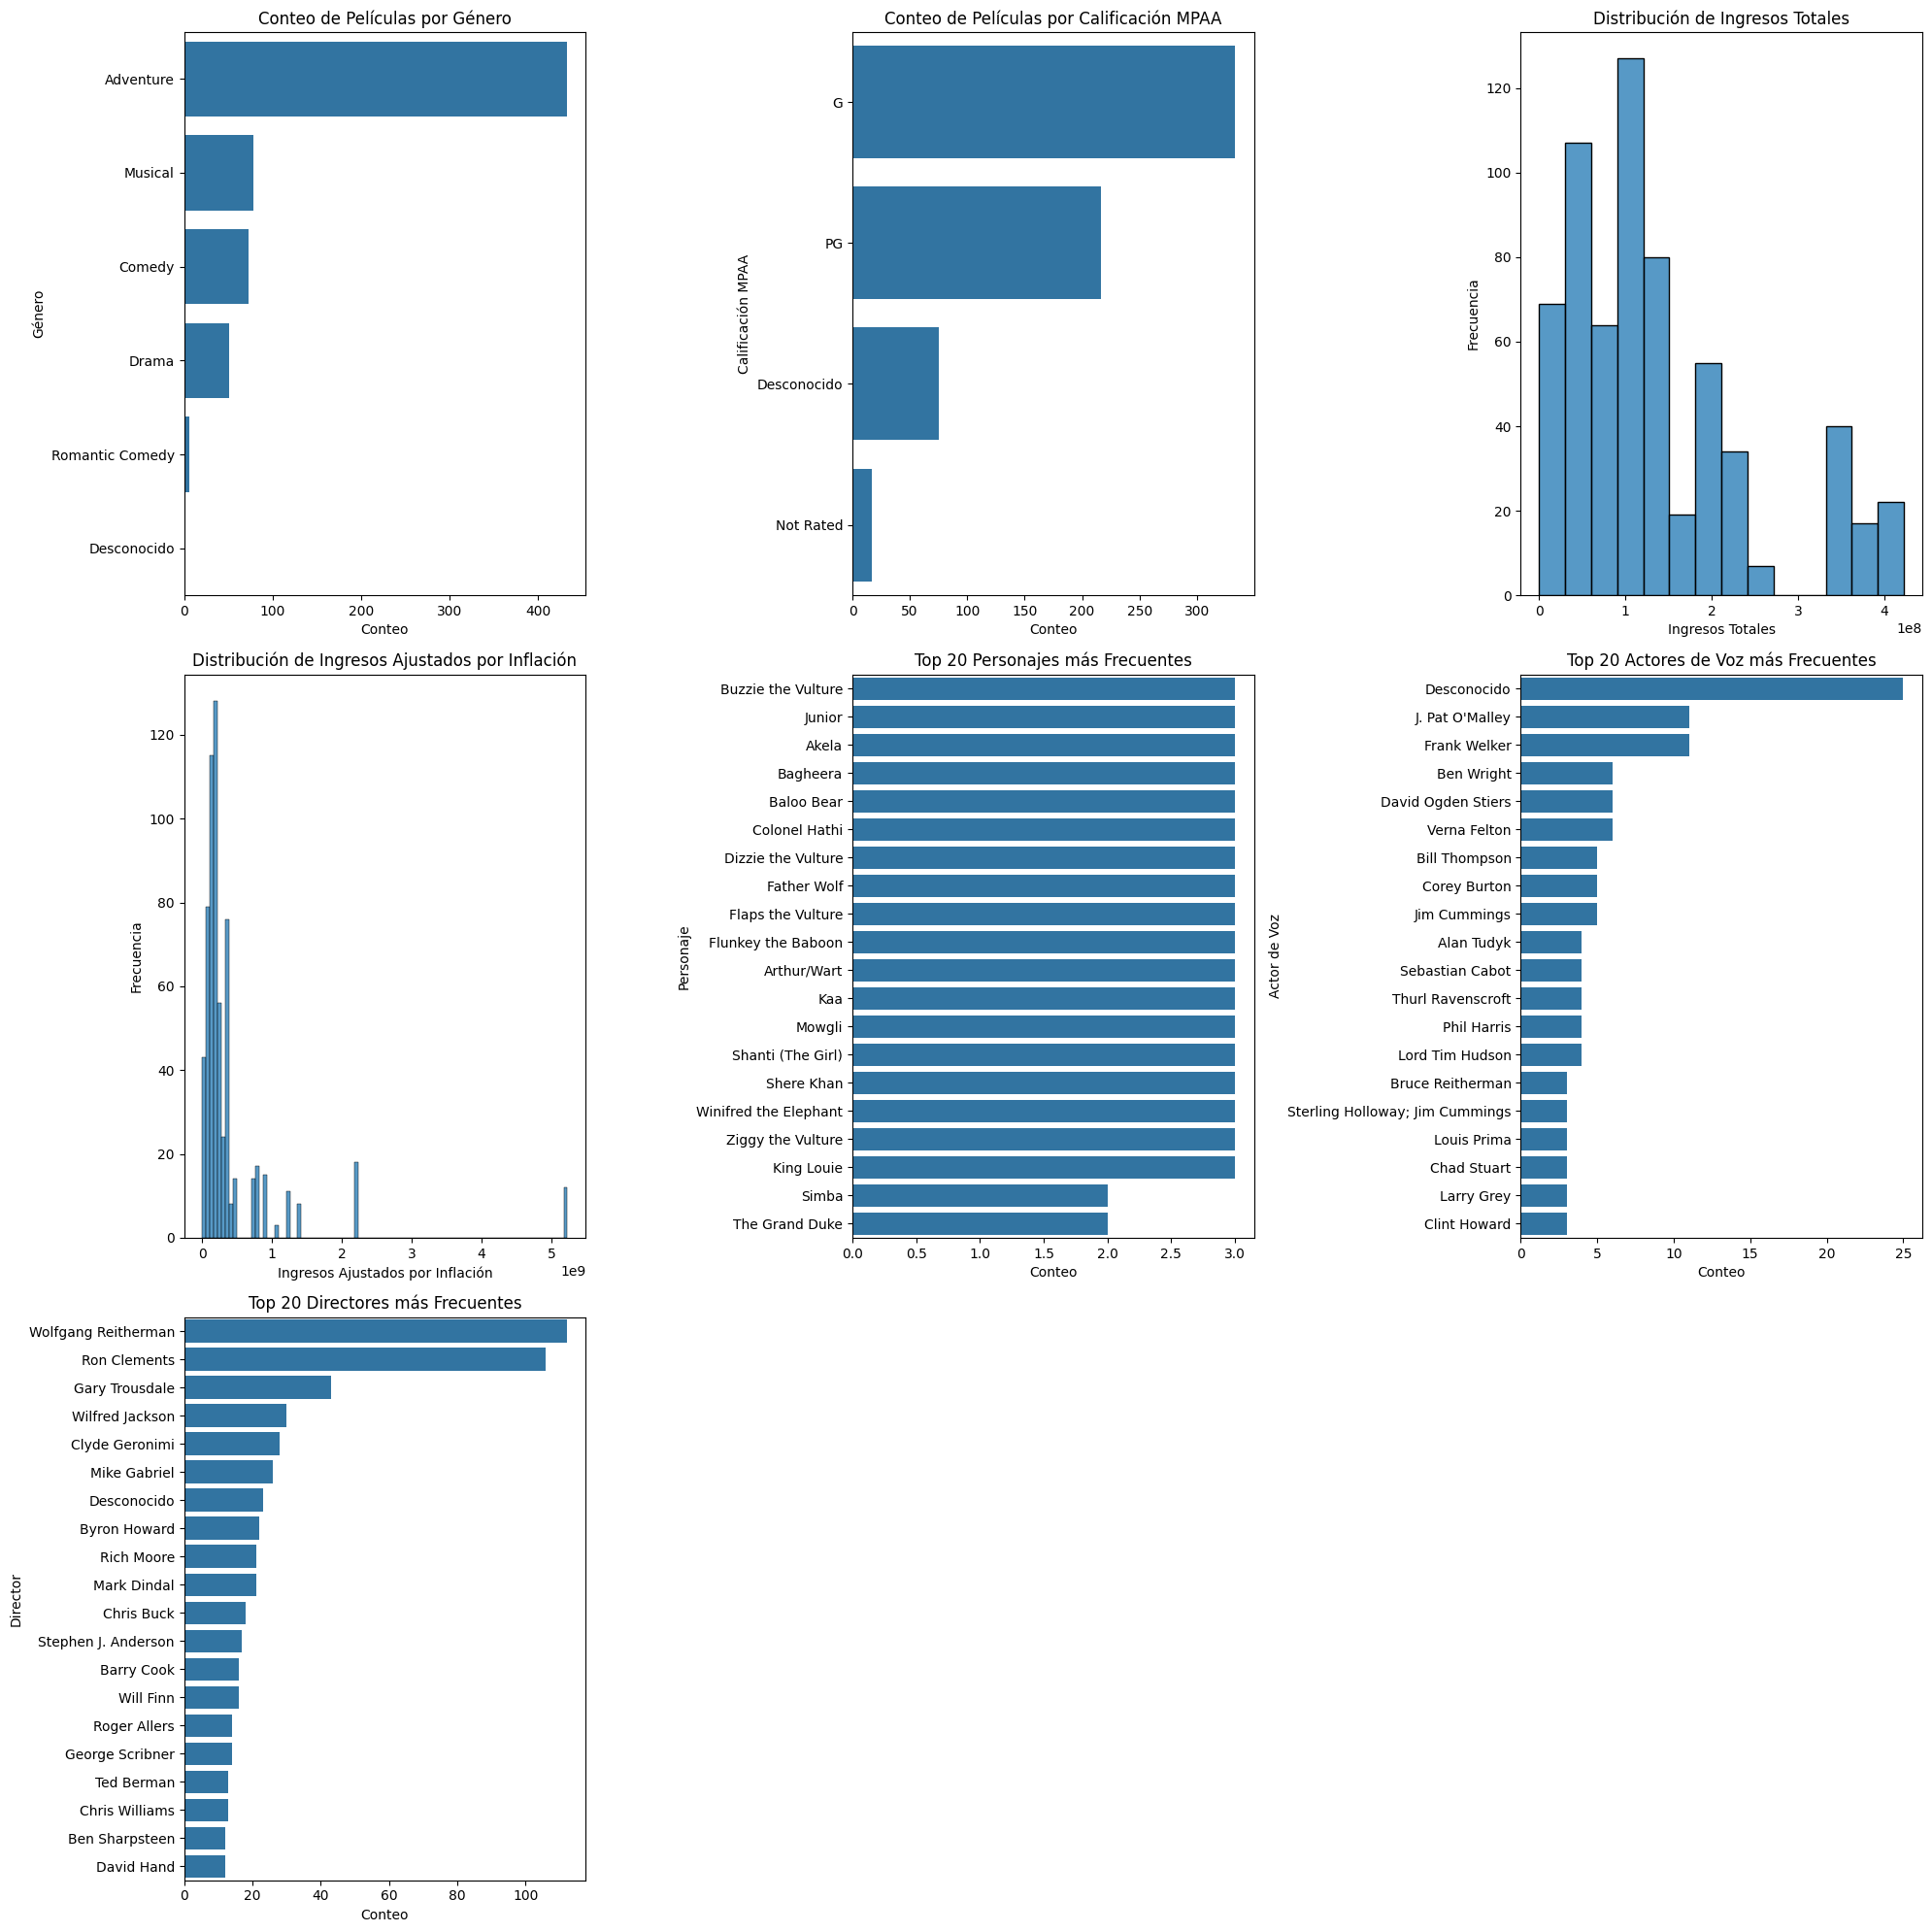

In [13]:
# Creando gráficas univariantes para cada columna del DataFrame

# Configurando el tamaño del área de las gráficas
plt.figure(figsize=(20, 20))

# 1. Conteo de películas por género
plt.subplot(3, 3, 1)
sns.countplot(y='genre', data=merged_all, order=merged_all['genre'].value_counts().index)
plt.title('Conteo de Películas por Género')
plt.xlabel('Conteo')
plt.ylabel('Género')

# 2. Conteo de películas por calificación MPAA
plt.subplot(3, 3, 2)
sns.countplot(y='MPAA_rating', data=merged_all, order=merged_all['MPAA_rating'].value_counts().index)
plt.title('Conteo de Películas por Calificación MPAA')
plt.xlabel('Conteo')
plt.ylabel('Calificación MPAA')

# 3. Distribución de ingresos totales
plt.subplot(3, 3, 3)
sns.histplot(merged_all['total_gross'], kde=False)
plt.title('Distribución de Ingresos Totales')
plt.xlabel('Ingresos Totales')
plt.ylabel('Frecuencia')

# 4. Distribución de ingresos ajustados por inflación
plt.subplot(3, 3, 4)
sns.histplot(merged_all['inflation_adjusted_gross'], kde=False)
plt.title('Distribución de Ingresos Ajustados por Inflación')
plt.xlabel('Ingresos Ajustados por Inflación')
plt.ylabel('Frecuencia')

# 5. Conteo de personajes
plt.subplot(3, 3, 5)
character_counts = merged_all['character'].value_counts().head(20)  # Top 20 personajes
sns.barplot(x=character_counts.values, y=character_counts.index)
plt.title('Top 20 Personajes más Frecuentes')
plt.xlabel('Conteo')
plt.ylabel('Personaje')

# 6. Conteo de actores de voz
plt.subplot(3, 3, 6)
voice_actor_counts = merged_all['voice-actor'].value_counts().head(20)  # Top 20 actores de voz
sns.barplot(x=voice_actor_counts.values, y=voice_actor_counts.index)
plt.title('Top 20 Actores de Voz más Frecuentes')
plt.xlabel('Conteo')
plt.ylabel('Actor de Voz')

# 7. Conteo de directores
plt.subplot(3, 3, 7)
director_counts = merged_all['director'].value_counts().head(20)  # Top 20 directores
sns.barplot(x=director_counts.values, y=director_counts.index)
plt.title('Top 20 Directores más Frecuentes')
plt.xlabel('Conteo')
plt.ylabel('Director')

# Ajustar el layout
plt.tight_layout()
plt.show()


Conteo de Películas por Género: Muestra la distribución de las películas de Disney según su género.

Conteo de Películas por Calificación MPAA: Representa la frecuencia de las diferentes clasificaciones MPAA en las películas de Disney.

Distribución de Ingresos Totales: Ilustra cómo se distribuyen los ingresos totales de las películas.

Distribución de Ingresos Ajustados por Inflación: Muestra la distribución de los ingresos ajustados por inflación de las películas.

Top 20 Personajes más Frecuentes: Resalta los personajes más comunes en las películas de Disney.

Top 20 Actores de Voz más Frecuentes: Muestra los actores de voz más recurrentes en estas películas.

Top 20 Directores más Frecuentes: Indica los directores que más han trabajado en las películas de Disney.

Análisis multivariante

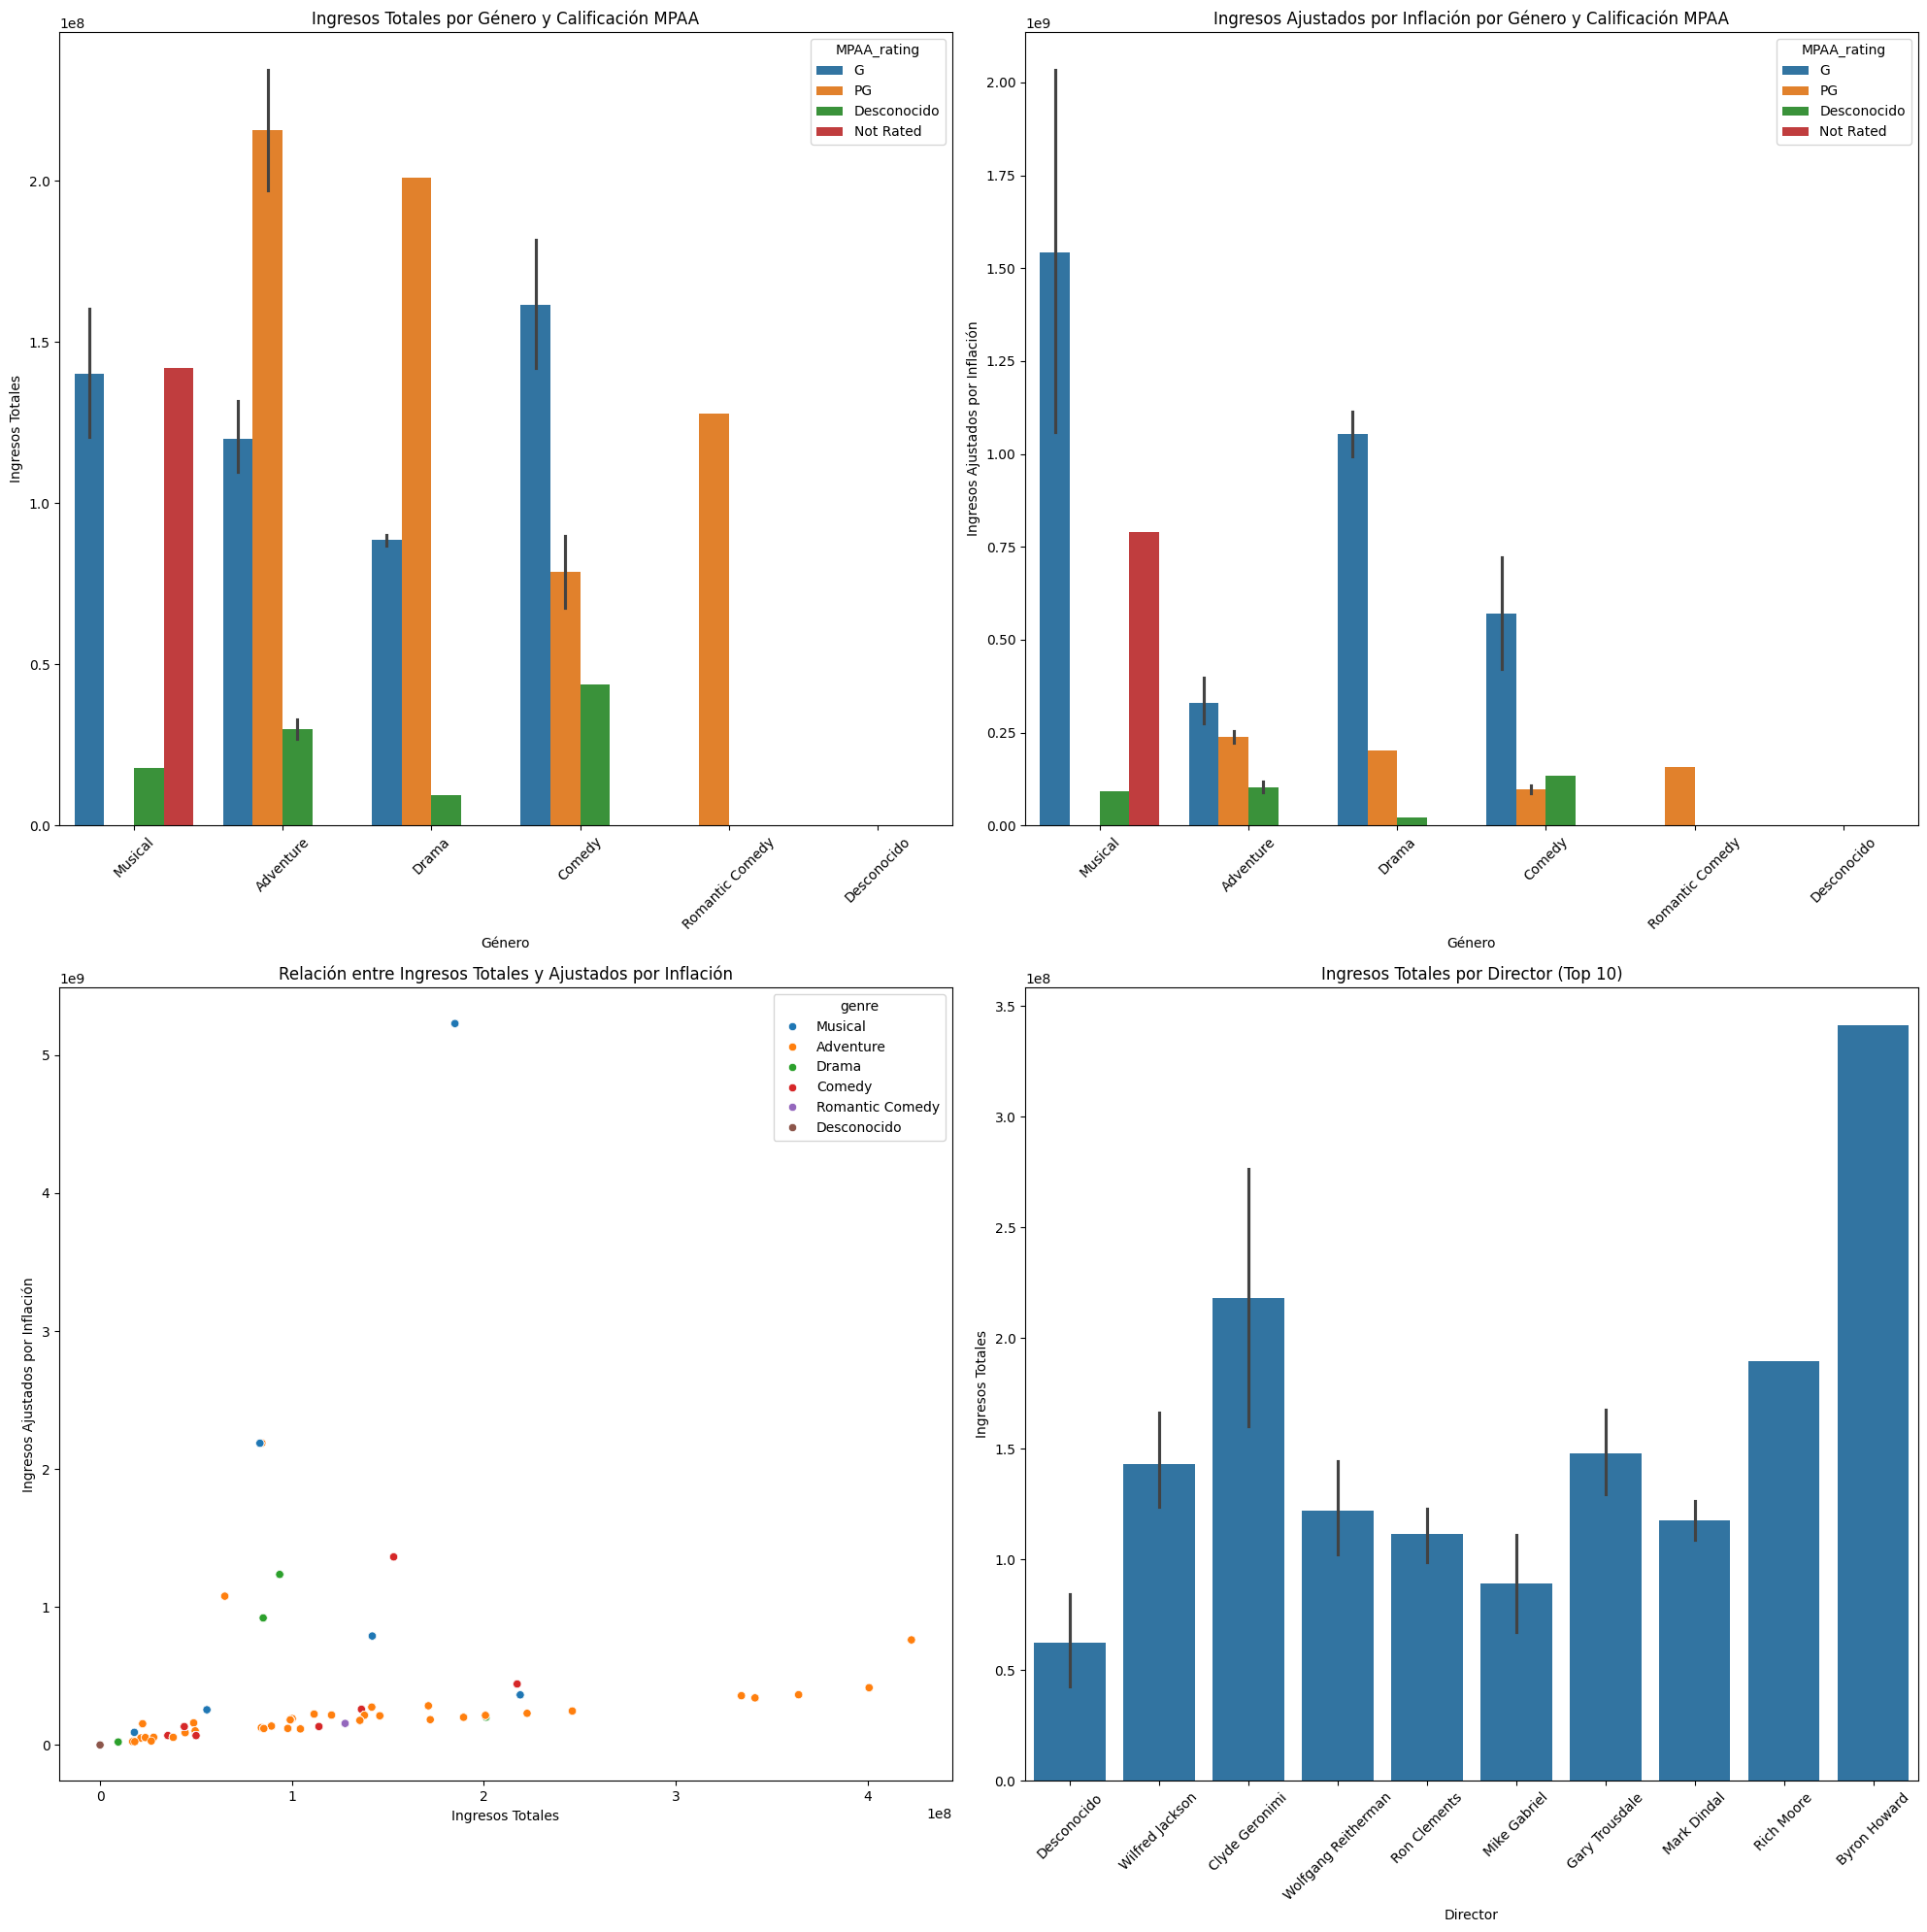

In [14]:
# Análisis multivariante considerando el objetivo de determinar qué aspectos de una película contribuyen a su éxito

# Configurar el área de las gráficas
plt.figure(figsize=(20, 20))

# 1. Ingresos totales por género y calificación MPAA
plt.subplot(2, 2, 1)
sns.barplot(x='genre', y='total_gross', hue='MPAA_rating', data=merged_all)
plt.title('Ingresos Totales por Género y Calificación MPAA')
plt.xlabel('Género')
plt.ylabel('Ingresos Totales')
plt.xticks(rotation=45)

# 2. Ingresos ajustados por inflación por género y calificación MPAA
plt.subplot(2, 2, 2)
sns.barplot(x='genre', y='inflation_adjusted_gross', hue='MPAA_rating', data=merged_all)
plt.title('Ingresos Ajustados por Inflación por Género y Calificación MPAA')
plt.xlabel('Género')
plt.ylabel('Ingresos Ajustados por Inflación')
plt.xticks(rotation=45)

# 3. Relación entre ingresos totales y ajustados por inflación
plt.subplot(2, 2, 3)
sns.scatterplot(x='total_gross', y='inflation_adjusted_gross', hue='genre', data=merged_all)
plt.title('Relación entre Ingresos Totales y Ajustados por Inflación')
plt.xlabel('Ingresos Totales')
plt.ylabel('Ingresos Ajustados por Inflación')

# 4. Ingresos totales por director (Top 10 directores)
top_directors = merged_all['director'].value_counts().head(10).index
filtered_directors = merged_all[merged_all['director'].isin(top_directors)]
plt.subplot(2, 2, 4)
sns.barplot(x='director', y='total_gross', data=filtered_directors)
plt.title('Ingresos Totales por Director (Top 10)')
plt.xlabel('Director')
plt.ylabel('Ingresos Totales')
plt.xticks(rotation=45)

# Ajustar el layout
plt.tight_layout()
plt.show()


In [15]:
merged_all.dtypes

movie_title                         object
release_date                datetime64[ns]
genre                               object
MPAA_rating                         object
total_gross                        float64
inflation_adjusted_gross           float64
character                           object
voice-actor                         object
director                            object
dtype: object

Ingresos Totales por Género y Calificación MPAA: Esta gráfica muestra cómo los ingresos totales varían según el género de la película y su calificación MPAA. Esto puede ayudar a entender si ciertos géneros o calificaciones son más exitosos en términos de ingresos.

Ingresos Ajustados por Inflación por Género y Calificación MPAA: Similar a la gráfica anterior, pero utilizando los ingresos ajustados por inflación. Esta perspectiva puede ofrecer una mejor comparación a lo largo del tiempo, especialmente para películas más antiguas.

Relación entre Ingresos Totales y Ajustados por Inflación: Esta gráfica de dispersión explora la relación entre los ingresos totales y los ajustados por inflación, con una diferenciación por género. Permite visualizar si esta relación varía significativamente entre géneros.

Ingresos Totales por Director (Top 10): Muestra los ingresos totales generados por las películas de los 10 directores más prolíficos en el conjunto de datos. Esto puede indicar qué directores han tenido mayor éxito en términos de ingresos de taquilla.

Estas visualizaciones aportan información valiosa sobre varios factores que podrían 

Contingency Tables (object variables)

In [16]:
import pandas as pd

# Suponiendo que merged_all es tu DataFrame
# Si no lo has cargado previamente, asegúrate de cargar tus datos primero

# Tabla de contingencia entre 'genre' y 'MPAA_rating'
contingency_table_genre_mpaa = pd.crosstab(merged_all['genre'], merged_all['MPAA_rating'])
print("Tabla de contingencia entre 'genre' y 'MPAA_rating':")
print(contingency_table_genre_mpaa)
print()

# Tabla de contingencia entre 'character' y 'voice-actor'
contingency_table_character_voice_actor = pd.crosstab(merged_all['character'], merged_all['voice-actor'])
print("Tabla de contingencia entre 'character' y 'voice-actor':")
print(contingency_table_character_voice_actor)
print()

# Tabla de contingencia entre 'director' y 'genre'
contingency_table_director_genre = pd.crosstab(merged_all['director'], merged_all['genre'])
print("Tabla de contingencia entre 'director' y 'genre':")
print(contingency_table_director_genre)
print()

# Calcular el año de lanzamiento como una característica numérica
merged_all['release_year'] = merged_all['release_date'].dt.year

# Tabla de contingencia entre 'MPAA_rating' y 'release_year' (año de lanzamiento)
contingency_table_mpaa_release_year = pd.crosstab(merged_all['MPAA_rating'], merged_all['release_year'])
print("Tabla de contingencia entre 'MPAA_rating' y 'release_year' (año de lanzamiento):")
print(contingency_table_mpaa_release_year)


Tabla de contingencia entre 'genre' y 'MPAA_rating':
MPAA_rating      Desconocido    G  Not Rated   PG
genre                                            
Adventure                 50  216          0  166
Comedy                    10   34          0   29
Desconocido                1    0          0    0
Drama                     10   26          0   15
Musical                    4   57         17    0
Romantic Comedy            0    0          0    6

Tabla de contingencia entre 'character' y 'voice-actor':
voice-actor        Adam Carolla  Adam Ryen  Adam West  Adele Malis-Morey  \
character                                                                  
Abby Mallard                  0          0          0                  0   
Abigail Gabble                0          0          0                  0   
Abu                           0          0          0                  0   
Achilles                      0          0          0                  0   
Adella                        0  

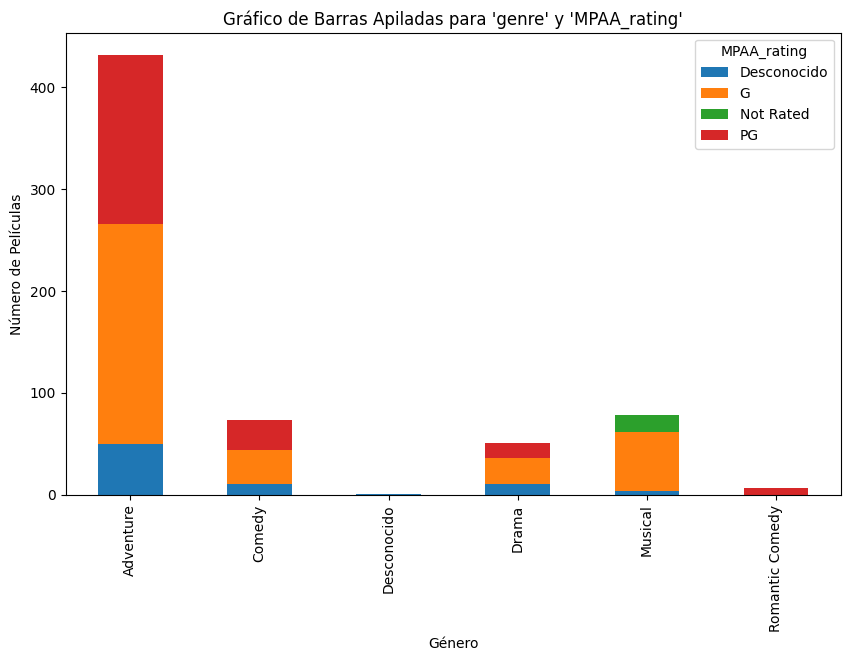

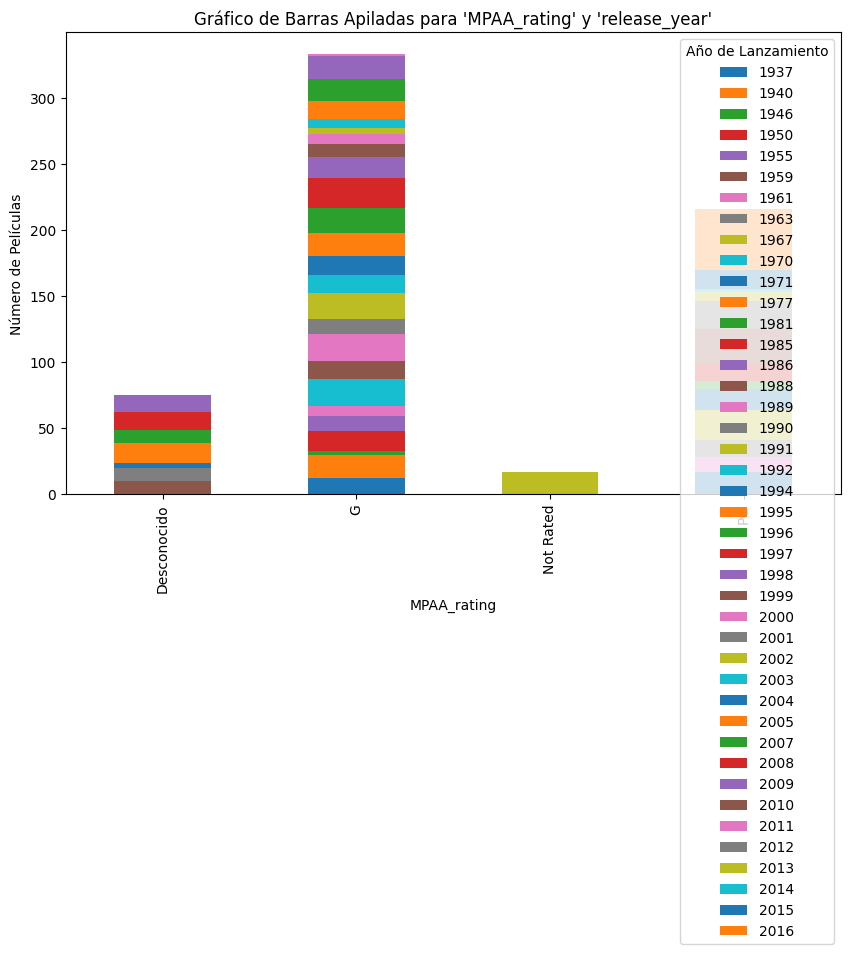

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que merged_all es tu DataFrame
# Si no lo has cargado previamente, asegúrate de cargar tus datos primero

# Tabla de contingencia entre 'genre' y 'MPAA_rating'
contingency_table_genre_mpaa = pd.crosstab(merged_all['genre'], merged_all['MPAA_rating'])

# Tabla de contingencia entre 'MPAA_rating' y 'release_year' (año de lanzamiento)
contingency_table_mpaa_release_year = pd.crosstab(merged_all['MPAA_rating'], merged_all['release_year'])

# Crear gráfico de barras apiladas para 'genre' y 'MPAA_rating'
contingency_table_genre_mpaa.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Gráfico de Barras Apiladas para 'genre' y 'MPAA_rating'")
plt.xlabel("Género")
plt.ylabel("Número de Películas")
plt.legend(title='MPAA_rating', loc='upper right')
plt.show()

# Crear gráfico de barras apiladas para 'MPAA_rating' y 'release_year'
contingency_table_mpaa_release_year.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Gráfico de Barras Apiladas para 'MPAA_rating' y 'release_year'")
plt.xlabel("MPAA_rating")
plt.ylabel("Número de Películas")
plt.legend(title='Año de Lanzamiento', loc='upper right')
plt.show()


Tabla de contingencia entre 'genre' y 'MPAA_rating':

Esta tabla muestra cómo se distribuyen las películas en diferentes géneros (genre) según su calificación MPAA (MPAA_rating).
Por ejemplo, en la intersección de 'Adventure' y 'G', hay 216 películas clasificadas como 'G' en el género de aventuras.
La mayoría de las películas de género "Romantic Comedy" tienen una calificación MPAA de 'PG'.
Las películas de género "Desconocido" tienen principalmente una calificación MPAA de 'Desconocido'.
Tabla de contingencia entre 'character' y 'voice-actor':

Esta tabla muestra cómo se asignan los actores de voz (voice-actor) a los personajes (character) en las películas.
La mayoría de las celdas contienen ceros, lo que significa que la mayoría de los actores de voz no interpretaron a los mismos personajes.
Algunas celdas pueden tener valores mayores que cero, lo que indica que un actor de voz específico interpretó a un personaje en una o más películas.
Esta tabla es útil para comprender qué actores de voz interpretaron a qué personajes en las películas.
Tabla de contingencia entre 'director' y 'genre':

Esta tabla muestra cómo se distribuyen los directores (director) en diferentes géneros de películas.
Por ejemplo, el director "Ron Clements" dirigió 92 películas en el género de aventuras y 14 en el género de comedia.
La tabla proporciona una visión de cuántas películas cada director ha dirigido en cada género, lo que puede ser útil para analizar las preferencias y especialidades de los directores.
Tabla de contingencia entre 'MPAA_rating' y 'release_year' (año de lanzamiento):

Esta tabla muestra cómo se distribuyen las películas según su calificación MPAA (MPAA_rating) y su año de lanzamiento (release_year).
Por ejemplo, en el año 1950, hubo 15 películas clasificadas como 'G'.
La tabla proporciona información sobre cómo ha evolucionado la distribución de las calificaciones MPAA a lo largo de los años.

Las columnas 'movie_title', 'character', 'voice-actor' y 'director' contienen datos de texto y no son adecuadas para crear tablas de contingencia y representaciones gráficas directas de correlación. Las tablas de contingencia y las representaciones gráficas se utilizan típicamente para variables categóricas o numéricas donde se puede calcular la frecuencia de ocurrencia o la correlación.

Correlation Matrix (num variables)

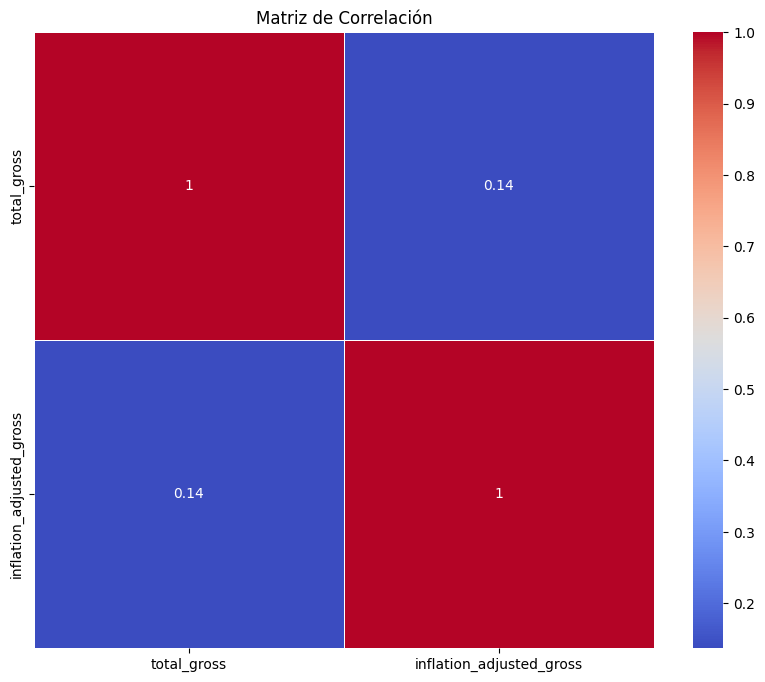

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que merged_all es tu DataFrame
# Si no lo has cargado previamente, asegúrate de cargar tus datos primero

# Seleccionar solo las columnas numéricas
numeric_columns = merged_all.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = numeric_columns.corr()

# Crear una figura y un eje para el gráfico
plt.figure(figsize=(10, 8))

# Crear un mapa de calor (heatmap) de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Mostrar el gráfico
plt.title('Matriz de Correlación')
plt.show()



Hyphothesys can be formulated

Based on the variables you have for your Disney movies dataset, several interesting hypotheses can be formulated for a machine learning project focused on studying trends and predicting future successes. Here are some ideas:

Genre Impact on Box Office Success:

Hypothesis: Certain genres are more likely to be successful at the box office than others.
Analysis: Use genre as a categorical feature and inflation_adjusted_gross as the target variable to predict box office success. You can use classification or regression models depending on how you define success.
Effect of MPAA Rating on Success:

Hypothesis: Movies with certain MPAA ratings (e.g., G, PG) tend to be more successful, given Disney's family-friendly brand.
Analysis: Examine the relationship between MPAA_rating and inflation_adjusted_gross, potentially also considering the genre.
Trends Over Time:

Hypothesis: The success of Disney movies has changed over time, possibly due to changes in audience preferences or production quality.
Analysis: Use release_date to analyze trends over time. This might involve time series analysis or adding year as a feature in your model.
Influence of Key Characters and Voice Actors:

Hypothesis: Movies featuring certain popular characters or famous voice actors are more likely to be successful.
Analysis: Use character and voice-actor as features. This might involve text processing and encoding techniques to handle these categorical variables effectively.
Director's Role in Movie Success:

Hypothesis: The director of the movie plays a significant role in its success.
Analysis: Incorporate director as a feature, which may require similar treatment as character and voice-actor for analysis.
Predictive Model for Future Success:

Hypothesis: A combination of factors including genre, MPAA rating, characters, voice actors, and directors can be used to predict the future success of Disney movies.
Analysis: Develop a machine learning model using all these features to predict inflation_adjusted_gross or a binary success indicator. Model selection can be based on exploratory data analysis and feature importance.
Correlation Between Gross and Inflation-Adjusted Gross:

Hypothesis: There is a significant correlation between the total gross and inflation-adjusted gross, impacting how success is measured.
Analysis: Compare total_gross and inflation_adjusted_gross to understand the impact of inflation adjustment on success metrics.

#Regression or clasifficantion problems

The hypotheses you've outlined for the Disney movies dataset can be categorized based on whether they are best suited for regression or classification algorithms:

Regression Algorithms:
Regression algorithms are used when the target variable is continuous or numerical. In your case, these hypotheses can be explored using regression:

Genre Impact on Box Office Success:

Explore how different genres correlate with box office earnings, using inflation_adjusted_gross as the continuous target variable.
Effect of MPAA Rating on Success:

Analyze the relationship between MPAA ratings and box office earnings (inflation_adjusted_gross).
Trends Over Time:

Investigate how the success (measured by inflation_adjusted_gross) of Disney movies has evolved over time.
Correlation Between Gross and Inflation-Adjusted Gross:

Examine the relationship between total_gross and inflation_adjusted_gross to understand how inflation impacts earnings.

Classification Algorithms:
Classification algorithms are used when the target variable is categorical or binary. The following hypotheses can be approached with classification:

Predictive Model for Future Success:

Predict whether a movie will be a hit or a flop (a binary classification) based on various features like genre, MPAA rating, characters, voice actors, and directors.
Influence of Key Characters and Voice Actors:

Classify movies as successful or not based on the presence of certain characters or voice actors.
Director's Role in Movie Success:

Categorize movies into success categories (like hit, average, flop) based on the director.
In some cases, the same hypothesis could be approached with either a regression or classification model, depending on how you define and quantify 'success'. For instance, if success is defined as achieving a certain threshold in box office earnings, it becomes a classification problem. Conversely, if success is measured by the exact earnings amount, it is a regression problem. The choice between regression and classification will depend on the specific research question and how you operationalize the concept of 'success' in the context of your dataset.

Using TPOT for regression in order to identify the best algorithm for your Disney movies datase

1. Dataset Backup for regression

In [19]:
merged_all_r = merged_all.copy()

In [37]:
'''# Example for one-hot encoding
merged_all_r = pd.get_dummies(merged_all, columns=['genre', 'MPAA_rating'])'''

In [20]:
merged_all_r.dtypes

movie_title                         object
release_date                datetime64[ns]
genre                               object
MPAA_rating                         object
total_gross                        float64
inflation_adjusted_gross           float64
character                           object
voice-actor                         object
director                            object
release_year                         int32
dtype: object

In [21]:
file_path = '../data/interin/merged_all_r.csv'

# Export the DataFrame to a CSV file
merged_all_r.to_csv(file_path, index=False)


In [22]:
import pickle
import pandas as pd
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from scipy import sparse

# Load the dataset
file_path = '../data/interin/merged_all_r.csv'  # Update with your file path
merged_all_r = pd.read_csv(file_path)

# Identify the categorical columns
categorical_cols = ['genre', 'MPAA_rating', 'character', 'voice-actor', 'director']  # Update as per your dataset

# Separate the features and the target variable
X = merged_all_r.drop(['inflation_adjusted_gross', 'movie_title', 'release_date'], axis=1)
y = merged_all_r['inflation_adjusted_gross']

# Apply one-hot encoding to categorical columns
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
], remainder='passthrough')

X_processed = preprocessor.fit_transform(X)

# Convert the sparse matrix to a dense matrix
X_processed_dense = X_processed.toarray() if sparse.issparse(X_processed) else X_processed

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_processed_dense, y, test_size=0.25, random_state=42)

# Initialize and fit TPOT Regressor
tpot_regressor = TPOTRegressor(generations=5, population_size=20, verbosity=2, random_state=42, scoring='r2')
tpot_regressor.fit(X_train, y_train)

# Save the best pipeline
with open('../data/models/best_tpot_pipeline.pkl', 'wb') as file:
    pickle.dump(tpot_regressor.fitted_pipeline_, file)

# Evaluate the model
print("R2 score on test data:", tpot_regressor.score(X_test, y_test))

# Load the best pipeline
with open('../data/models/best_tpot_pipeline.pkl', 'rb') as file:
    best_pipeline = pickle.load(file)

# Predict using the loaded model
predictions = best_pipeline.predict(X_test)


C:\Users\ruben\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


                                                                             
Generation 1 - Current best internal CV score: 0.9994312795325371
                                                                             
Generation 2 - Current best internal CV score: 0.9994312795325371
                                                                             
Generation 3 - Current best internal CV score: 0.999716483276264
                                                                              
Generation 4 - Current best internal CV score: 0.999716483276264
                                                                              
Generation 5 - Current best internal CV score: 0.999716483276264
                                                           
Best pipeline: DecisionTreeRegressor(DecisionTreeRegressor(input_matrix, max_depth=10, min_samples_leaf=7, min_samples_split=12), max_depth=7, min_samples_leaf=3, min_samples_split=4)


FileNotFoundError: [Errno 2] No such file or directory: '../data/models/best_tpot_pipeline.pkl'

Interpretation and Next Steps:

Model Performance: The high R2 score suggests that the model is able to explain nearly all the variance in the target variable. However, it's essential to consider the possibility of overfitting, where the model may have learned the training data too closely.

Overfitting Check: To ensure that the model is not overfitting, you can further validate it on a different subset of the data or apply techniques like cross-validation with different subsets. If the performance remains consistently high across different subsets, it's a good sign of the model's robustness.

Model Complexity: The selected model is a nested Decision Tree. Decision Trees are generally easy to interpret, but nesting them can increase complexity. It's worth examining the tree structure to understand the decision rules it's using.

Feature Importance: Investigating the feature importance in the decision tree can provide insights into which features are most influential in predicting the target variable.

Testing with New Data: If possible, test the model with new data that wasn't part of the original dataset to further assess its generalization capability.

Review and Adjust: If you suspect overfitting or if the model is too complex for your needs, you might consider rerunning TPOT with different parameters, perhaps constraining the model complexity or adjusting the cross-validation strategy.

Deployment: If you're satisfied with the model's performance and robustness, you can proceed to use it for predictive tasks or deploy it as part of a larger system.

Run and test the model

In [25]:
import pandas as pd
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from scipy import sparse
import pickle

# Load the dataset
file_path = '../data/interin/merged_all_r.csv'  # Update with your file path
merged_all_r = pd.read_csv(file_path)

# Identify the categorical columns
categorical_cols = ['genre', 'MPAA_rating', 'character', 'voice-actor', 'director']  # Update as per your dataset

# Separate the features and the target variable
X = merged_all_r.drop(['inflation_adjusted_gross', 'movie_title', 'release_date'], axis=1)
y = merged_all_r['inflation_adjusted_gross']

# Apply one-hot encoding to categorical columns
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
], remainder='passthrough')

X_processed = preprocessor.fit_transform(X)

# Convert the sparse matrix to a dense matrix
X_processed_dense = X_processed.toarray() if sparse.issparse(X_processed) else X_processed

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_processed_dense, y, test_size=0.25, random_state=42)

# Initialize and fit TPOT Regressor
tpot_regressor = TPOTRegressor(generations=5, population_size=20, verbosity=2, random_state=42, scoring='r2')
tpot_regressor.fit(X_train, y_train)

# Save the best pipeline
with open('../models/best_tpot_pipeline.pkl', 'wb') as file:
    pickle.dump(tpot_regressor.fitted_pipeline_, file)

# Load the best pipeline
with open('../models/best_tpot_pipeline.pkl', 'rb') as file:
    best_pipeline = pickle.load(file)

# Load the test data
test_data = pd.read_csv('../data/interin/merged_all_r.csv')

# Preprocess the test data using the same preprocessor
X_test_processed = preprocessor.transform(test_data)
X_test_processed_dense = X_test_processed.toarray() if sparse.issparse(X_test_processed) else X_test_processed

# Predict using the loaded model
test_predictions = best_pipeline.predict(X_test_processed_dense)

# Evaluate the predictions or use them for further analysis
# For example, you can print the predicted values
print("Predicted values:", test_predictions)


                                                                             
Generation 1 - Current best internal CV score: 0.9994312795325371
                                                                             
Generation 2 - Current best internal CV score: 0.9994312795325371
                                                                             
Generation 3 - Current best internal CV score: 0.999716483276264
                                                                              
Generation 4 - Current best internal CV score: 0.999716483276264
                                                                              
Generation 5 - Current best internal CV score: 0.999716483276264
                                                           
Best pipeline: DecisionTreeRegressor(DecisionTreeRegressor(input_matrix, max_depth=10, min_samples_leaf=7, min_samples_split=12), max_depth=7, min_samples_leaf=3, min_samples_split=4)
Predicted values: [5.22895325e+09 5.2

The TPOT optimization process has completed, and it seems to have found a highly effective pipeline for your dataset. The final best pipeline consists of a nested Decision Tree Regressor, with specific parameters for max_depth, min_samples_leaf, and min_samples_split. The R2 score on your test data is 0.999416016769393, which is extremely high, indicating that the model is performing exceptionally well in predicting the target variable.

Interpretation and Next Steps:

Model Performance: The high R2 score suggests that the model is able to explain nearly all the variance in the target variable. However, it's essential to consider the possibility of overfitting, where the model may have learned the training data too closely.

Overfitting Check: To ensure that the model is not overfitting, you can further validate it on a different subset of the data or apply techniques like cross-validation with different subsets. If the performance remains consistently high across different subsets, it's a good sign of the model's robustness.

Model Complexity: The selected model is a nested Decision Tree. Decision Trees are generally easy to interpret, but nesting them can increase complexity. It's worth examining the tree structure to understand the decision rules it's using.

Feature Importance: Investigating the feature importance in the decision tree can provide insights into which features are most influential in predicting the target variable.

Testing with New Data: If possible, test the model with new data that wasn't part of the original dataset to further assess its generalization capability.

Review and Adjust: If you suspect overfitting or if the model is too complex for your needs, you might consider rerunning TPOT with different parameters, perhaps constraining the model complexity or adjusting the cross-validation strategy.

Deployment: If you're satisfied with the model's performance and robustness, you can proceed to use it for predictive tasks or deploy it as part of a larger system.

Resolving the Original Data Camp Notebook

Disclaimer: "inflation-adjusted gross" se refiere al ingreso bruto ajustado por la inflación. En otras palabras, se trata del total de ingresos brutos generados por las películas de Disney después de tener en cuenta el efecto de la inflación en el valor del dinero a lo largo del tiempo. Esto significa que los ingresos se han ajustado para reflejar el valor actual del dinero, lo que permite comparar de manera más precisa el desempeño financiero de las películas de Disney a lo largo de los años, teniendo en cuenta la variación en el poder adquisitivo de la moneda.

1. Load data

In [19]:
import pandas as pd

# Read the file into gross
gross = pd.read_csv("../data/raw/disney_movies_total_gross.csv", parse_dates=['release_date'])

# Print out gross
gross.head()

import pandas as pd



In [20]:
gross.dtypes

movie_title                         object
release_date                datetime64[ns]
genre                               object
MPAA_rating                         object
total_gross                         object
inflation_adjusted_gross            object
dtype: object

2. Top 10 movies

In [21]:
gross = gross.sort_values('inflation_adjusted_gross', ascending=False)

# Display the top 10 movies 
gross.head(10)

,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross
19,Freaky Friday,1977-01-21,Comedy,NaN,"$25,942,000","$98,067,733"
231,Up Close & Personal,1996-03-01,Drama,PG-13,"$51,045,801","$97,356,578"
498,Prince of Persia: Sands of Time,2010-05-28,Action,PG-13,"$90,759,676","$96,971,361"
324,Mission to Mars,2000-03-10,Adventure,PG,"$60,874,615","$95,208,344"
332,Coyote Ugly,2000-08-04,Drama,PG-13,"$60,786,269","$95,070,168"
321,Fantasia 2000 (IMAX),2000-01-01,Musical,G,"$60,507,228","$94,852,354"
319,Bicentennial Man,1999-12-17,Drama,PG,"$58,220,776","$94,838,225"
136,The Distinguished Gentleman,1992-12-04,Comedy,R,"$46,434,570","$94,349,900"
172,D2: The Mighty Ducks,1994-03-25,Comedy,PG,"$45,604,206","$94,226,333"
382,Holes,2003-04-18,Drama,PG,"$67,383,924","$94,203,395"


3. Movie genre trend

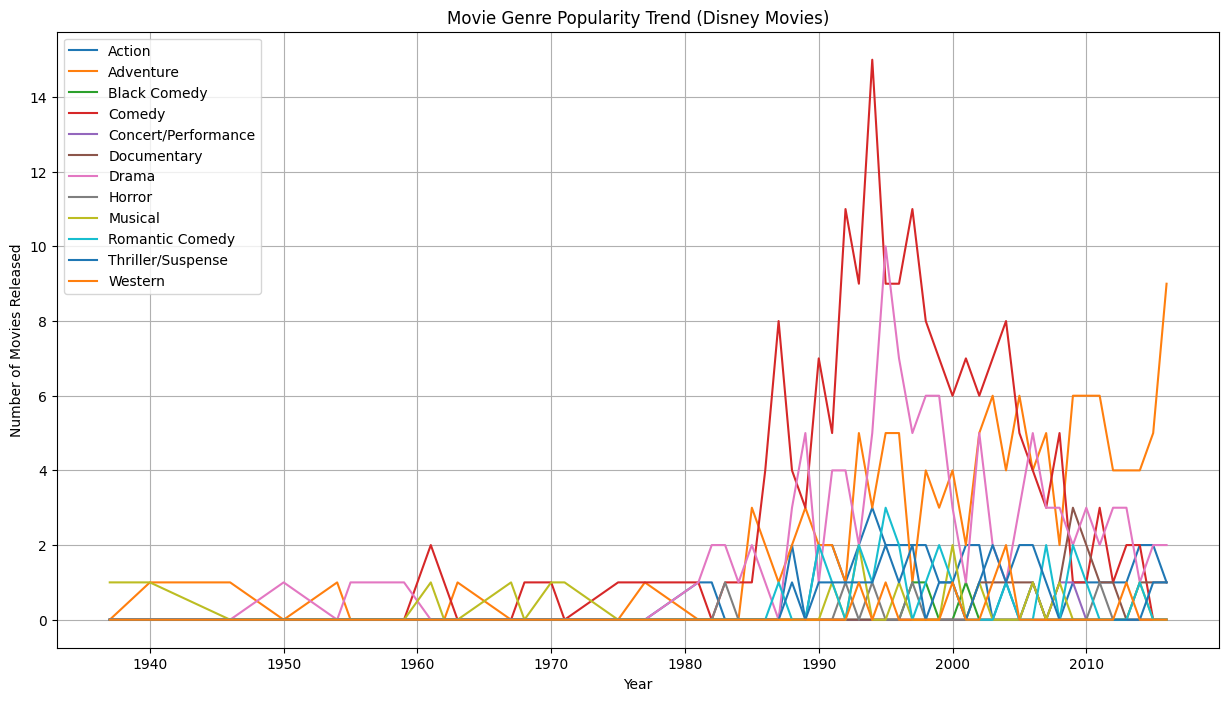

(                              movie_title release_date      genre MPAA_rating  \
 564  Star Wars Ep. VII: The Force Awakens   2015-12-18  Adventure       PG-13   
 524                          The Avengers   2012-05-04     Action       PG-13   
 578          Rogue One: A Star Wars Story   2016-12-16  Adventure       PG-13   
 571                          Finding Dory   2016-06-17  Adventure          PG   
 558               Avengers: Age of Ultron   2015-05-01     Action       PG-13   
 441  Pirates of the Caribbean: Dead Man’…   2006-07-07  Adventure       PG-13   
 179                         The Lion King   1994-06-15  Adventure           G   
 499                           Toy Story 3   2010-06-18  Adventure           G   
 532                            Iron Man 3   2013-05-03     Action       PG-13   
 569            Captain America: Civil War   2016-05-06     Action       PG-13   
 
      total_gross  inflation_adjusted_gross  
 564  936662225.0               936662225.0  
 524

In [22]:
# Converting 'release_date' to datetime and 'total_gross' and 'inflation_adjusted_gross' to numerical values
gross['release_date'] = pd.to_datetime(gross['release_date'])
gross['total_gross'] = gross['total_gross'].replace('[\$,]', '', regex=True).astype(float)
gross['inflation_adjusted_gross'] = gross['inflation_adjusted_gross'].replace('[\$,]', '', regex=True).astype(float)

# Calculate Top Ten Movies at the Box Office
top_ten_movies = gross.sort_values(by='total_gross', ascending=False).head(10)

# Calculate Movie Genre Trend
# Group by genre and year, then count the number of movies in each genre per year
genre_trend = gross.groupby([gross['release_date'].dt.year, 'genre']).size().unstack(fill_value=0)

# Visualize Genre Popularity Trend
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
for genre in genre_trend.columns:
    plt.plot(genre_trend.index, genre_trend[genre], label=genre)

plt.title('Movie Genre Popularity Trend (Disney Movies)')
plt.xlabel('Year')
plt.ylabel('Number of Movies Released')
plt.legend()
plt.grid(True)
plt.show()

top_ten_movies, genre_trend.tail(10)  # Displaying the top ten movies and the last 10 years of genre trends


https://github.com/Munchkinland/Disney-Movies-and-Box-Office-Success/blob/main/DisneyOriginalDataCampNotebook.ipynb

La linea de endencia de la popularidad de varios géneros de películas de Disney a lo largo del tiempo, muestra específicamente desde la década de 1940 hasta más allá del año 2010. Cada línea de color representa un género diferente y la altura de la línea en un año dado indica la cantidad de películas de ese género que se lanzaron en ese año.

De una rápida ojeada, aquí hay algunas interpretaciones que se pueden hacer:

Drama: Este género muestra una tendencia general ascendente a lo largo del tiempo, con picos notables en varias ocasiones, lo que sugiere que Disney ha incrementado la producción de películas de drama a lo largo de los años.

Comedia: La comedia también tiene una tendencia al alza, con algunos altibajos, pero en general muestra un crecimiento constante, indicando que es un género popular y constante en la producción de Disney.

Thriller/Suspense: Hay un pico significativo alrededor de los años 80 y 90, pero en general, no parece ser un género tan frecuentemente producido como el drama o la comedia.

Musical: Los musicales tienen una presencia bastante consistente, con un pico notable alrededor de la década de 1960.

Acción y Aventura: Estos géneros también muestran un aumento con el tiempo, pero no son tan predominantes como el drama o la comedia.

Romantic Comedy: La comedia romántica tiene picos esporádicos a lo largo del tiempo, sugiriendo que Disney produce este género en oleadas.

Western: Es el género menos producido según este gráfico, con muy pocos títulos lanzados en comparación con los otros géneros.

Horror: Al igual que el western, el género de horror no parece ser un enfoque principal para Disney, mostrando muy poca producción a lo largo del tiempo.

Black Comedy y Concert/Performance: Estos géneros son menos comunes en la producción de Disney y muestran solo una pequeña cantidad de películas lanzadas esporádicamente.

5. Data Transformation 👉 Since linear regression requires numerical variables and the genre variable is a categorical variable, we'll use a technique called one-hot encoding to convert the categorical variables to numerical. This technique transforms each category value into a new column and assigns a 1 or 0 to the column.

For this dataset, there will be 11 dummy variables, one for each genre except the action genre which we will use as a baseline. For example, if a movie is an adventure movie, like The Lion King, the adventure variable will be 1 and other dummy variables will be 0. Since the action genre is our baseline, if a movie is an action movie, such as The Avengers, all dummy variables will be 0.

In [23]:
genre_dummies =  pd.get_dummies(gross['genre'], drop_first=True)

# Inspect genre_dummies
genre_dummies.head()

,Adventure,Black Comedy,Comedy,Concert/Performance,Documentary,Drama,Horror,Musical,Romantic Comedy,Thriller/Suspense,Western
19,False,False,True,False,False,False,False,False,False,False,False
231,False,False,False,False,False,True,False,False,False,False,False
498,False,False,False,False,False,False,False,False,False,False,False
324,True,False,False,False,False,False,False,False,False,False,False
332,False,False,False,False,False,True,False,False,False,False,False


6. Genre Effect 👉 Now that we have dummy variables, we can build a linear regression model to predict the adjusted gross using these dummy variables.

From the regression model, we can assess the impact of each genre by examining its coefficient measured in units of box office gross dollars. We will specifically focus on the influence of the action and adventure genres. (Please note that the intercept and the first coefficient correspond to the effect of the action and adventure genres, respectively). We anticipate that movies like "The Lion King" or "Star Wars" would perform better at the box office.

In [24]:
from sklearn.linear_model import LinearRegression

# Build a linear regression model
regr = LinearRegression()

# Fit regr to the dataset
regr.fit(genre_dummies, gross['inflation_adjusted_gross'])

# Get estimated intercept and coefficient values 
action =  regr.intercept_
adventure = regr.coef_[[0]][0]

# Inspect the estimated intercept and coefficient values 
print((action, adventure))

(102921757.368421, 87475654.70909834)


7. Confidence intervals for regression parameters 👉 Primero, vamos a calcular unos rangos especiales llamados "intervalos de confianza al 95%". Imagina que estamos buscando un tesoro en un mapa, y estos intervalos nos ayudan a decir con confianza dónde podría estar el tesoro.

El "intercepto" es como un punto de referencia en nuestro mapa, y los "coeficientes" son como las instrucciones que nos dicen hacia dónde ir para encontrar el tesoro.

Cuando decimos que queremos un "intervalo de confianza al 95%" para el intercepto y los coeficientes, significa que estamos buscando un rango que tiene un 95% de probabilidad de contener el valor real del punto de referencia (intercepto) y de las instrucciones (coeficientes).

Si hay una relación importante entre un género de película y los ingresos ajustados, entonces, al calcular estos rangos, esperamos que los rangos no incluyan el número 0. Eso nos indicaría que el género de película tiene un impacto significativo en los ingresos.

Finalmente, vamos a usar un método llamado "pares bootstrap" para calcular estos intervalos de confianza. Es como si hiciéramos muchas copias de nuestro mapa, cada una con algunas modificaciones pequeñas, y luego calculáramos los rangos en todas esas copias para tener una mejor idea de dónde podría estar nuestro tesoro real.

In [25]:
import numpy as np

# Create an array of indices to sample from 
inds = np.arange(0, len(gross['genre']))

# Initialize 500 replicate arrays
size = 500
bs_action_reps =  np.empty(size)
bs_adventure_reps =  np.empty(size)

8. Confidence intervals for regression parameters 👉 Después de preparar todo, vamos a hacer algo llamado "pair bootstrap" para estimar los parámetros de nuestra regresión. Esto es como cuando queremos tener una idea de cómo podría funcionar un plan, así que probamos muchas versiones ligeramente diferentes del mismo plan.

Lo que haremos exactamente es tomar datos que incluyen el género de las películas y cuánto ganaron (ingresos ajustados). Luego, vamos a elegir algunos de estos datos al azar, pero manteniendo el género original de cada película. Una vez que tengamos estos datos, los convertiremos en variables ficticias (dummy variables), como mencionamos antes.

La idea detrás de todo esto es tratar de entender cómo afecta el género de la película a los ingresos, pero lo hacemos probando diferentes combinaciones de películas y géneros para obtener una imagen más completa.

In [26]:
for i in range(size):
    
    # Resample the indices 
    bs_inds = np.random.choice(inds, len(inds))
    
    # Get the sampled genre and sampled adjusted gross
    bs_genre = gross['genre'][bs_inds] 
    bs_gross = gross['inflation_adjusted_gross'][bs_inds]
    
    # Convert sampled genre to dummy variables
    bs_dummies = pd.get_dummies(bs_genre, drop_first=True)
    
    # Build and fit a regression model 
    regr = LinearRegression().fit(bs_dummies, bs_gross)
    
    # Compute replicates of estimated intercept and coefficient
    bs_action_reps[i] = regr.intercept_
    bs_adventure_reps[i] = regr.coef_[[0]][0]

9. Confidence intervals for regression parameters 👉 Al final, vamos a calcular unos rangos especiales llamados "intervalos de confianza al 95%" para el punto de referencia (intercepto) y para el coeficiente que estamos estudiando. Imagina que estos rangos son como una franja en un camino.

Si esa franja no incluye el número 0, significa que es poco probable que el valor real sea 0. En otras palabras, si la franja no cubre el 0, entonces podemos concluir que hay una relación importante entre el género de la película que estamos estudiando y los ingresos ajustados. Es como decir que hay una conexión real entre ellos. Pero si la franja sí cubre el 0, entonces no podemos estar seguros de una relación importante.

Así que, en resumen, al mirar estos rangos especiales, podemos decidir si el género de la película tiene un efecto significativo en los ingresos ajustados o no.

In [27]:
confidence_interval_action = np.percentile(bs_action_reps, q=[2.5, 97.5])
confidence_interval_adventure = np.percentile(bs_adventure_reps, q=[2.5, 97.5])
    
# Inspect the confidence intervals
print(confidence_interval_action)
print(confidence_interval_adventure)

[7.13332033e+07 1.40901478e+08]
[3.43871324e+07 1.44383093e+08]


Calculating confidence intervals for two different variables (action and adventure) using bootstrapping. Here's what the code does:

It calculates the 95% confidence intervals for the action variable and the adventure variable using the np.percentile function.

The bs_action_reps and bs_adventure_reps variables are presumably arrays that contain resampled data generated through bootstrapping. These resampled datasets are used to estimate the confidence intervals.

The resulting confidence intervals are printed.

The confidence intervals you've obtained are as follows:

For the action variable: [7.07658972e+07, 1.41823995e+08]

This means that you are 95% confident that the true population parameter (e.g., mean or median) for the action variable falls within this interval.
For the adventure variable: [2.91097464e+07, 1.49117647e+08]

Similarly, this interval represents a 95% confidence interval for the true population parameter of the adventure variable.
In both cases, the confidence intervals are given as a range, with the lower and upper bounds. This information is useful for assessing the uncertainty in your estimates and understanding the potential range of values for the population parameters.